# imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# read csv file

In [3]:
data = pd.read_csv("iris.csv")

# data exploration and cleaning

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'SepalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>, <Axes: >]], dtype=object)

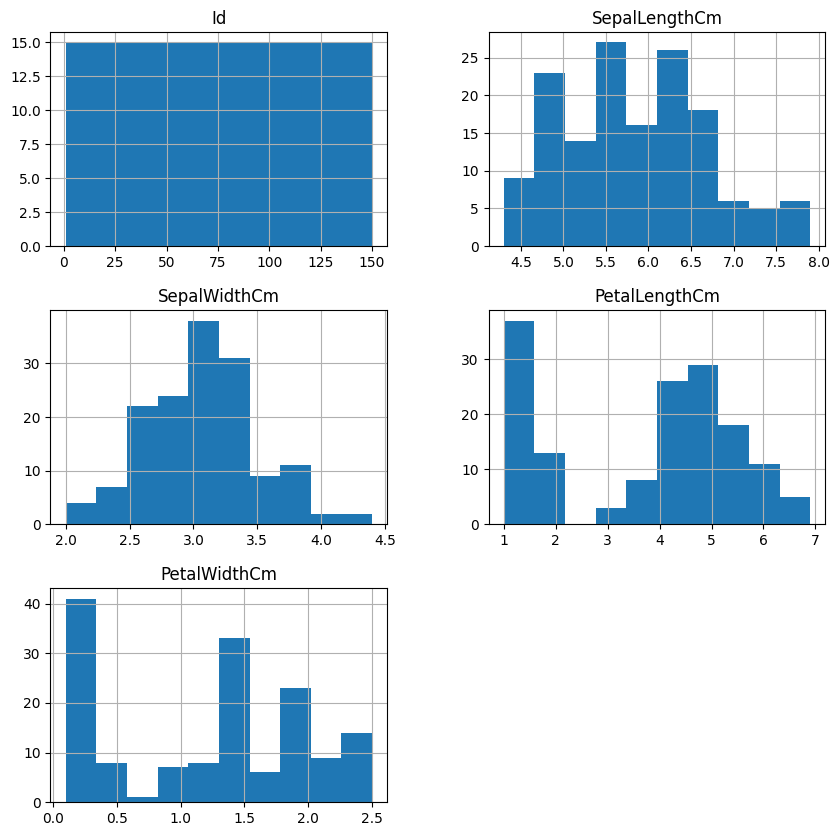

In [15]:
data.hist( figsize=(10,10))

/var/folders/nq/tc269ls107df2z0mr0ynx0140000gn/T/ipykernel_14695/56552930.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


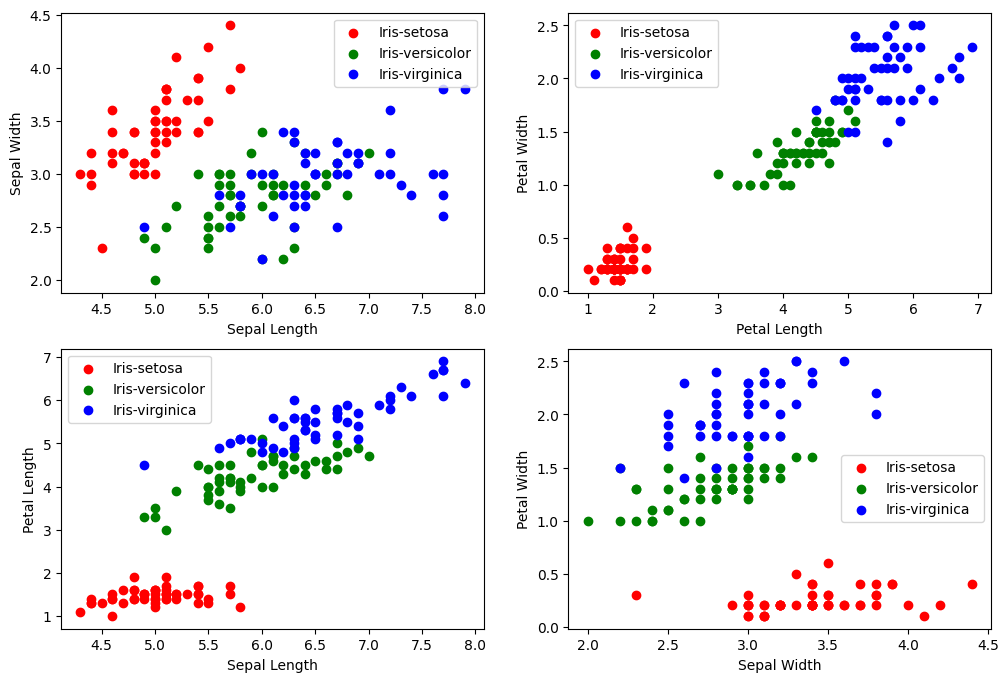

In [7]:
colors = ['red', 'green', 'blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
plt.subplots(figsize=(12,8))
plt.subplot(2,2,1)
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.subplot(2,2,2)
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

plt.subplot(2,2,3)
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

plt.subplot(2,2,4)
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [8]:
for col in data.columns:
    print(col)

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


In [9]:
# there is no use of id column so deleted
data = data.drop(columns=['Id'])

In [10]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# prepare data for training and testing

In [11]:
features = data.drop(columns = ['Species'])
X = features.to_numpy()
Y = data['Species'].to_numpy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

# train and test model 

In [13]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [14]:
predictions = model.predict(X_test)
# Calculate the accuracy
acc = accuracy_score(y_test, predictions)


In [15]:

model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [16]:
predictions2 = model2.predict(X_test)
accu = accuracy_score(y_test, predictions2)


In [17]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
predictions3 = model3.predict(X_test)
accu3 = accuracy_score(y_test, predictions3)

# Evaluation with confusion matrix and accuracy

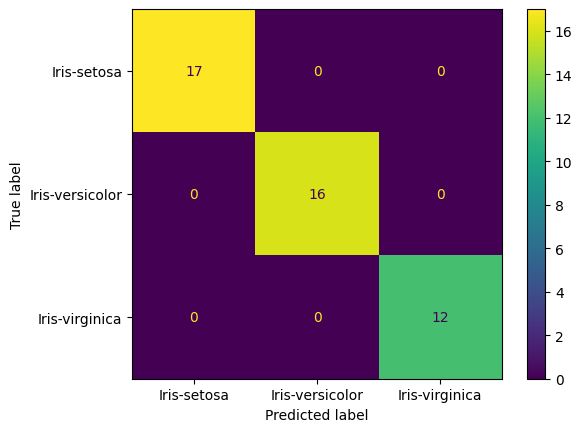

In [19]:

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

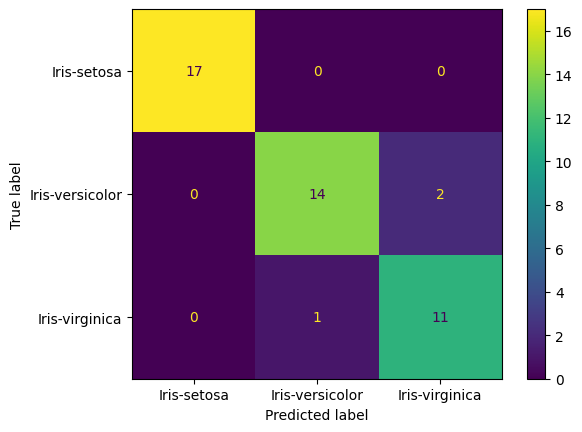

In [20]:
cm = confusion_matrix(y_test, predictions2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model2.classes_)
disp.plot()
plt.show()

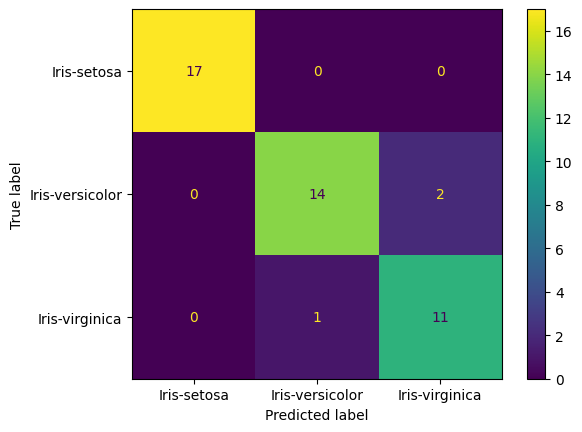

In [21]:
cm = confusion_matrix(y_test, predictions2, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model3.classes_)
disp.plot()
plt.show()

In [22]:
print("The accuracy of Support vector machine algorithm is ", "%.2f" %  (acc*100), "%")
print("The accuracy of Naive Bayes algorithm is ", "%.2f" %  (accu*100), "%")
print("The accuracy of KNN algorithm is ", "%.2f" %  (accu3*100), "%")

The accuracy of Support vector machine algorithm is  100.00 %
The accuracy of Naive Bayes algorithm is  93.33 %
The accuracy of KNN algorithm is  95.56 %
